<a href="https://colab.research.google.com/github/emmelinetsen/deep_learning/blob/master/assignment_4/LeNet_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#import lib
import torch
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (3,3))

<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

In [0]:
import torchvision
import torchvision.transforms as transforms

# downloading MNIST dataset
# transforming the PIL Image to tensors
trainset = torchvision.datasets.MNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())

#loading the training data from trainset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle = True)

In [67]:
# view the training data

#iterating into the data
dataiter = iter(trainloader)
images, labels = dataiter.next()

# view the shape of 4 images
print(images.shape) 

# view the shape of 1 image
print(images[1].shape) 

# view the label of the first image
print(labels[1].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
3


In [32]:
#taking the first image from batch of 4 images

img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [33]:
#convert the tensor to numpy for displaying the image
npimg = img.numpy()
print(npimg.shape)

(1, 28, 28)


In [34]:
#for displaying the image, shape of the image should be height * width * channels
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(28, 28, 1)


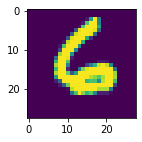

In [36]:
plt.figure(figsize = (2,2))
plt.imshow(np.squeeze(npimg))
plt.show()

In [35]:
np.squeeze(npimg).shape

(28, 28)

In [0]:
classes = ('0','1','2','3','4','5','6','7','8','9')

def imshow(img):
    npimg = img.numpy() #convert the tensor to numpy for displaying the image
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #for displaying the image, shape of the image should be height * width * channels
    plt.show()

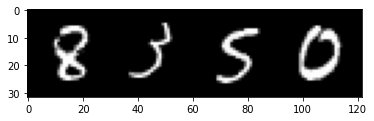

8 3 5 0


In [69]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## LeNet Architecture with Tanh

In [0]:
#class implementing the lenet network with Tanh
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size = 5), #(N, 1, 28, 28) -> (N, 6, 24, 24)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2), #(N, 6, 24, 24) -> (N, 6, 12, 12)
            
            nn.Conv2d(6, 16, kernel_size = 5), #(N, 6, 12, 12) -> (N, 6, 8, 8)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2)) #(N, 6, 8, 8) -> (N, 16, 4, 4)
    
        self.fc_model = nn.Sequential(
            nn.Linear(256, 120), # (N, 256) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120, 84), # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84, 10))  # (N, 84)  -> (N, 10))
            
    def forward(self, x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        #print(x)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x            


In [44]:
net = LeNet()
#running the lenet cnn
out = net(images)

#printing the class probabilities for 4 different images
print(out)

tensor([[-0.0794,  0.0492,  0.0133,  0.1139,  0.0032,  0.0511, -0.0393,  0.0142,
         -0.0120,  0.0927],
        [-0.0889,  0.0722,  0.0174,  0.1273, -0.0034,  0.0475, -0.0093,  0.0379,
          0.0140,  0.0742],
        [-0.0677,  0.0566,  0.0139,  0.1121, -0.0034,  0.0425, -0.0270,  0.0185,
          0.0015,  0.0957],
        [-0.0672,  0.0325,  0.0102,  0.0869,  0.0026,  0.0600, -0.0337,  0.0020,
         -0.0184,  0.1031]], grad_fn=<AddmmBackward>)


In [45]:
#taking only the maximum value 
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([3, 3, 3, 9])


In [0]:
# Training LeNet 

#increase the batch size
batch_size = 128

#download the data again and set the train, test loader with different batch size
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [50]:
#reference a variable to gpu card to make the training faster
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#function to do evaluation (calculate the accuracy) in gpu
def evaluation(dataloader):
    total, correct = 0, 0
    
    #keeping the network in evaluation mode
    net.eval()
    for data in dataloader:
        inputs, labels = data
        #moving the inputs and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
#create the model object and move it to GPU
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/10, Test acc: 95.13, Train acc: 94.99
Epoch: 1/10, Test acc: 97.24, Train acc: 97.23
Epoch: 2/10, Test acc: 97.75, Train acc: 98.17
Epoch: 3/10, Test acc: 98.12, Train acc: 98.53
Epoch: 4/10, Test acc: 98.30, Train acc: 98.82
Epoch: 5/10, Test acc: 98.28, Train acc: 98.94
Epoch: 6/10, Test acc: 98.44, Train acc: 99.10
Epoch: 7/10, Test acc: 98.60, Train acc: 99.47
Epoch: 8/10, Test acc: 98.52, Train acc: 99.39
Epoch: 9/10, Test acc: 98.50, Train acc: 99.40


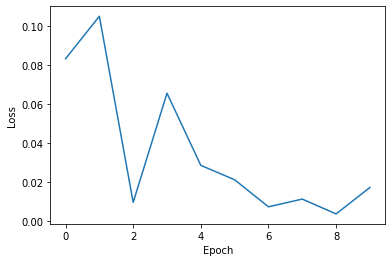

CPU times: user 5min 35s, sys: 1min 24s, total: 6min 59s
Wall time: 7min


In [53]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):
    #iterate through all the batches in each epoch
    for i, data in enumerate(trainloader, 0):
        
        #keeping the network in training mode
        net.train()
    
        inputs, labels = data
        #moving the input and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        #clear the gradients
        opt.zero_grad()
        #forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        #backward pass
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Test on testing data

In [54]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 98.50, Train acc: 99.40


## LeNet Architecture with ReLU

In [0]:
#Used ReLU non-linear activation instead of tanh

class LeNet_ReLU(nn.Module):
    def __init__(self): 
        super(LeNet_ReLU, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
# Training LeNet 

#increase the batch size
batch_size = 128

#download the data again and set the train, test loader with different batch size
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [73]:
#reference a variable to gpu card to make the training faster
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#Train using the GPU
net = LeNet_ReLU().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())


In [74]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in range(max_epochs):
    #iterate through all the batches in each epoch
    for i, data in enumerate(trainloader, 0):
        
        #keeping the network in training mode
        net.train()
    
        inputs, labels = data
        #moving the input and labels to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        #clear the gradients
        opt.zero_grad()
        #forward pass
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        #backward pass
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

RuntimeError: ignored